In [29]:
# path library
from pathlib import Path

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data manipulation
import pandas as pd

# machine learning
from scipy.stats import pointbiserialr
from sklearn.metrics import matthews_corrcoef

In [2]:
# random seed to be used throughout
random_seed = 6

# sample size of the data to use for EDA
sample_size = 20000

In [3]:
# path to processed data
DATA_PATH = Path.cwd().resolve().parents[0] / "data" / "processed" / "processed_data.csv"

In [4]:
df = pd.read_csv(DATA_PATH)

# The data at a glance

In [5]:
df.head()

,month,time,day,hospital,m_age,m_us_born,m_edu,num_of_prenatals,WIC,smoker,...,eclampsia,preterm_births,infert_treatment,prev_c_section,sti,induction,steroids,antibiotics,anesthesia,c_section
0,1,5.016667,2,1,30,1,3,8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.150000,3,1,28,1,6,13,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5.416666,3,1,41,1,6,11,0,0,...,0,1,0,1,0,0,0,1,1,0
3,1,19.166666,2,0,29,1,4,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,22.683332,2,1,28,1,6,13,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388302 entries, 0 to 3388301
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   month              int64  
 1   time               float64
 2   day                int64  
 3   hospital           int64  
 4   m_age              int64  
 5   m_us_born          int64  
 6   m_edu              int64  
 7   num_of_prenatals   int64  
 8   WIC                int64  
 9   smoker             int64  
 10  m_bmi              float64
 11  pre_diabetes       int64  
 12  gest_diabetes      int64  
 13  pre_hypertension   int64  
 14  gest_hypertension  int64  
 15  eclampsia          int64  
 16  preterm_births     int64  
 17  infert_treatment   int64  
 18  prev_c_section     int64  
 19  sti                int64  
 20  induction          int64  
 21  steroids           int64  
 22  antibiotics        int64  
 23  anesthesia         int64  
 24  c_section          int64  
dtypes: float64(2), int

In [7]:
# Downcast dtypes to optimize memory footprint
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')

# EDA

In [8]:
# We will split the columns into numeric and categorical for the analysis
df.columns

Index(['month', 'time', 'day', 'hospital', 'm_age', 'm_us_born', 'm_edu',
       'num_of_prenatals', 'WIC', 'smoker', 'm_bmi', 'pre_diabetes',
       'gest_diabetes', 'pre_hypertension', 'gest_hypertension', 'eclampsia',
       'preterm_births', 'infert_treatment', 'prev_c_section', 'sti',
       'induction', 'steroids', 'antibiotics', 'anesthesia', 'c_section'],
      dtype='object')

In [9]:
num_cols = ['month', 'time', 'day', 'm_age', 'm_edu', 'num_of_prenatals', 'm_bmi']
cat_cols = ['hospital', 'm_us_born','WIC', 'smoker', 'pre_diabetes',
            'gest_diabetes', 'pre_hypertension', 'gest_hypertension', 'eclampsia',
            'preterm_births', 'infert_treatment', 'prev_c_section', 'sti',
            'induction', 'steroids', 'antibiotics', 'anesthesia', 'c_section']

In [10]:
# We will only use a sample of the data while performing EDA
# to improve compute time.
df_sample = df.sample(sample_size, random_state=random_seed)

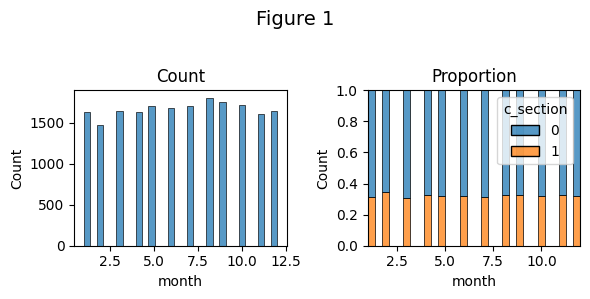

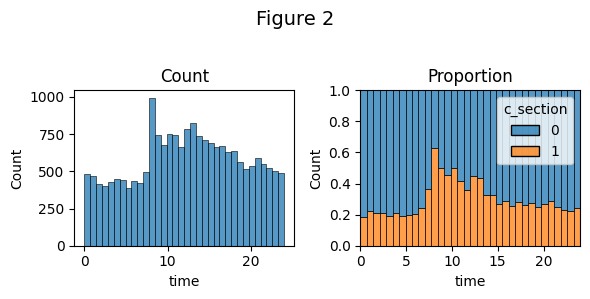

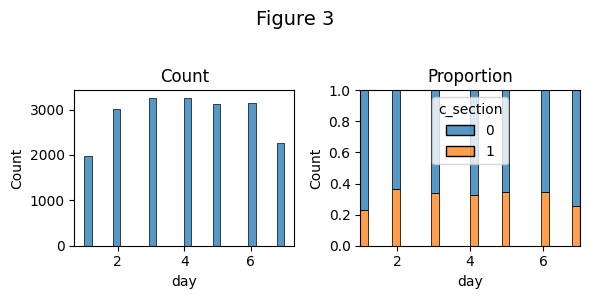

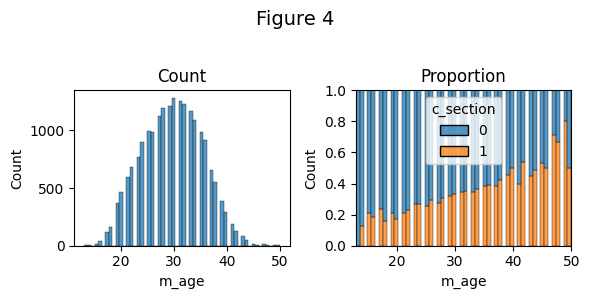

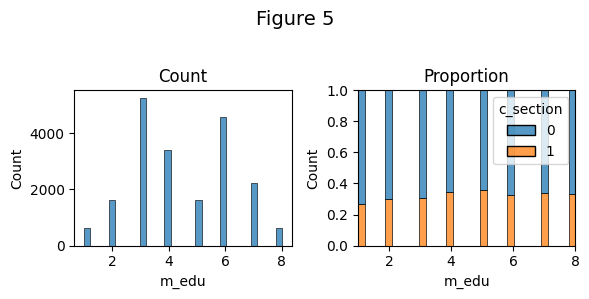

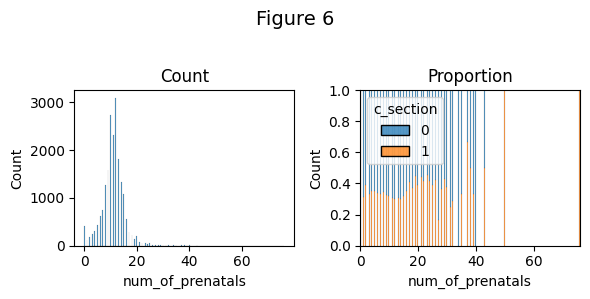

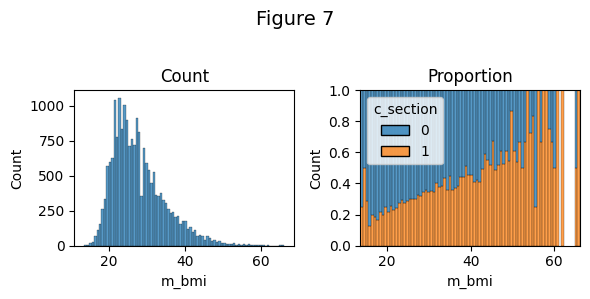

In [11]:
# Pairs of histograms for each numeric column.
# The left histogram shows the count for each column.
# The right histogram shows the proportion of c sections 
# vs vaginal births in each bin.
for i,col in enumerate(num_cols):
    fig, axes = plt.subplots(1, 2, figsize=(6,3))

    sns.histplot(df_sample, x=col, ax=axes[0])
    axes[0].set_title(f'Count')

    sns.histplot(df_sample, x=col, hue='c_section', multiple='fill', ax=axes[1])
    axes[1].set_title(f'Proportion')

    fig.suptitle(f'Figure {i+1}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
    plt.show()

A few observations from the histograms above:
- There is a spike of births, and in particular c-sections, around 8am.
  This could coincide with shift changes in a hospital and planned c-sections.
- There are fewer births and proportionally fewer c-sections on the weekends.
- As the mother's age increases, the rate of c-sections increases.
- Women whose highest level of education is a high school diploma/GED or a Bachelor's degree
  have the greatest representation in the data.
- As BMI inceases, so too does the rate of c-sections with the exception of the lowest BMIs.

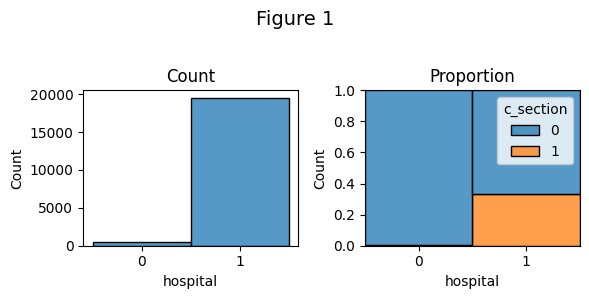

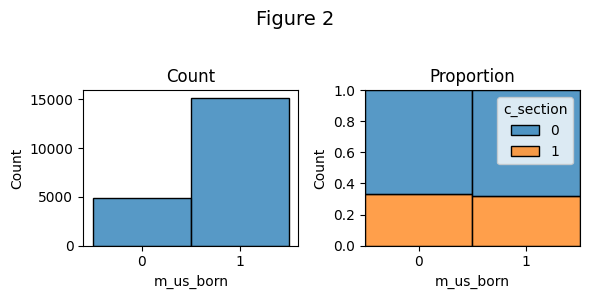

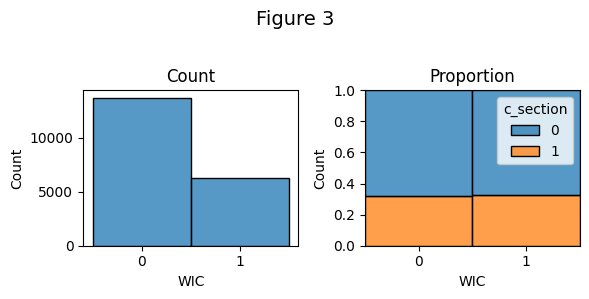

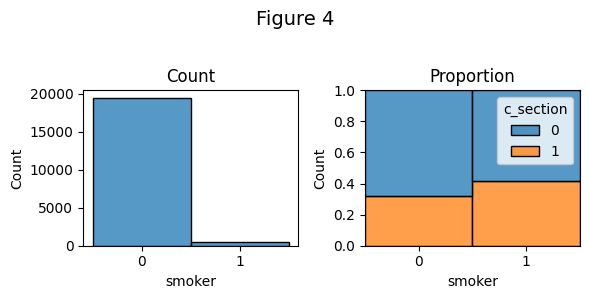

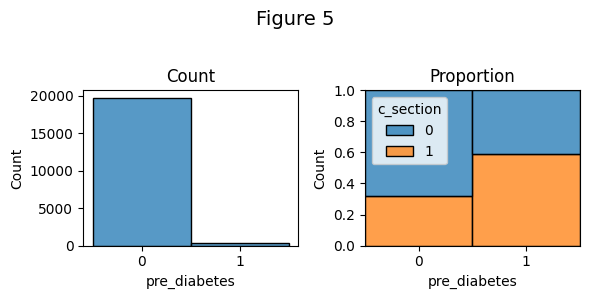

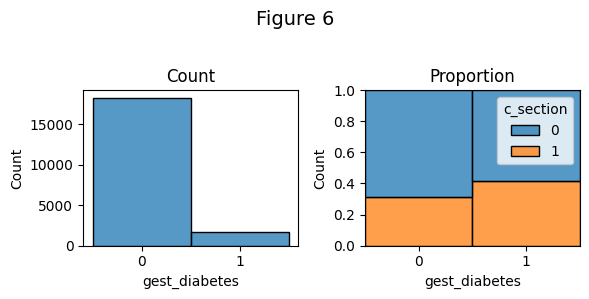

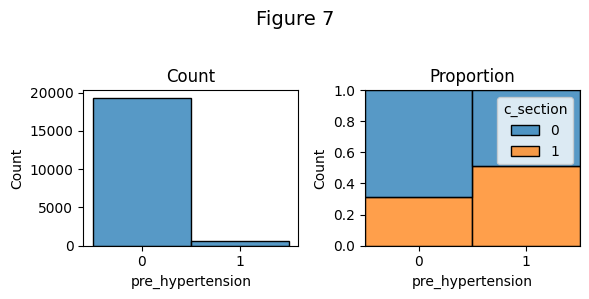

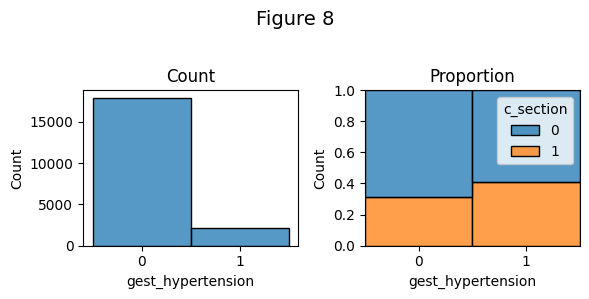

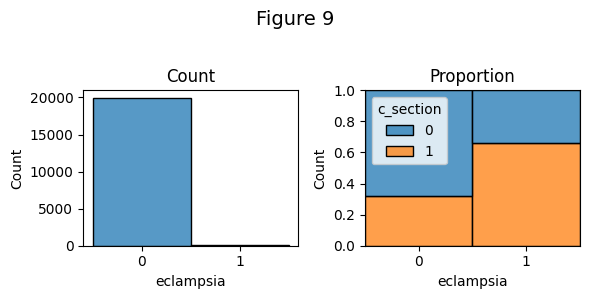

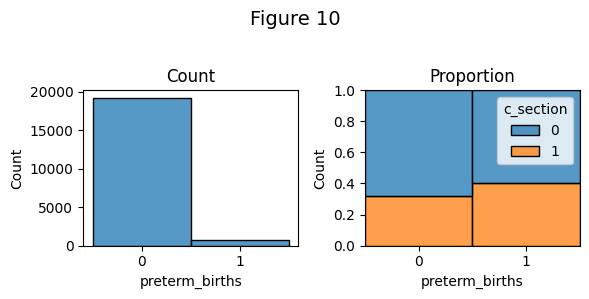

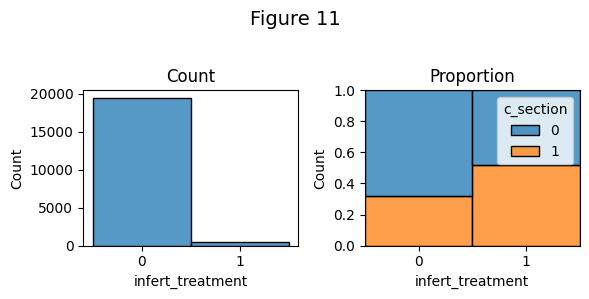

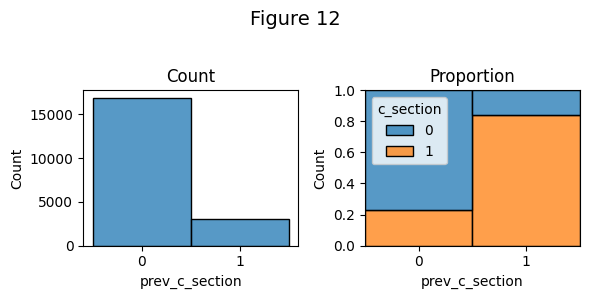

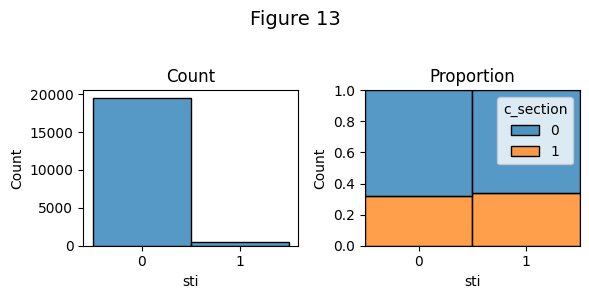

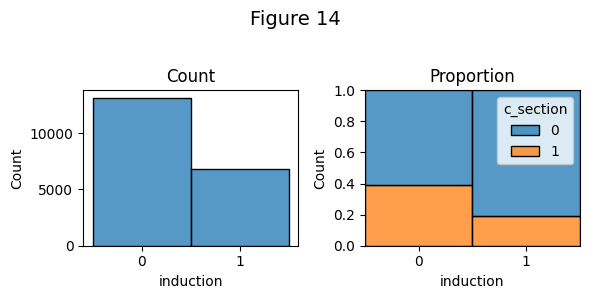

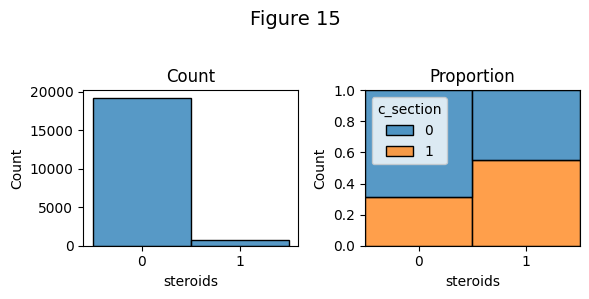

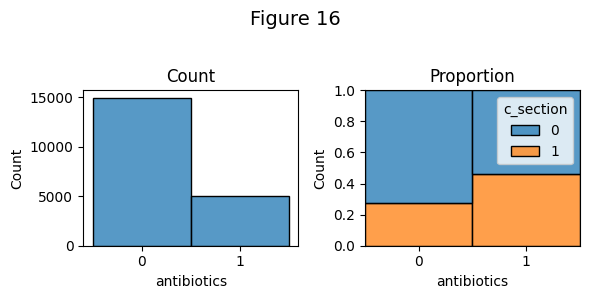

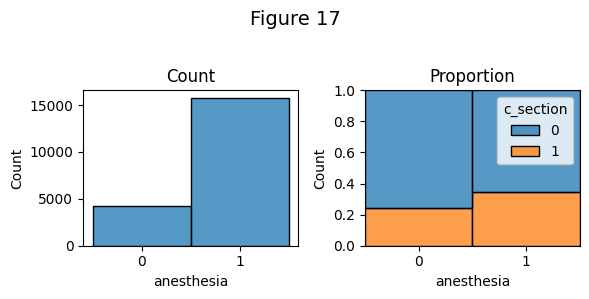

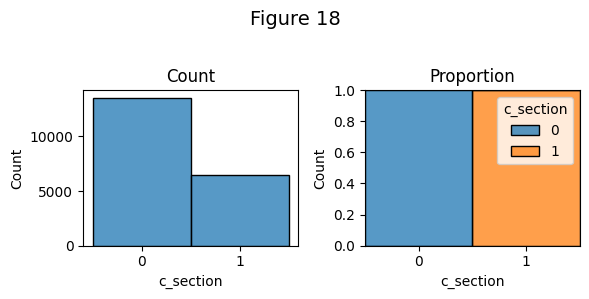

In [12]:
# Pairs of histograms for each categorical column.
# The left histogram shows the count for each column.
# The right histogram shows the proportion of c sections 
# vs vaginal births in each bin.
for i,col in enumerate(cat_cols):
    fig, axes = plt.subplots(1, 2, figsize=(6,3))

    sns.histplot(df_sample, x=col, discrete=True, ax=axes[0])
    axes[0].set_title(f'Count')
    axes[0].set_xticks([0,1])

    sns.histplot(df_sample, x=col, discrete=True, hue='c_section', multiple='fill', ax=axes[1])
    axes[1].set_title(f'Proportion')
    axes[1].set_xticks([0,1])

    fig.suptitle(f'Figure {i+1}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

A few observations from the histograms above:
- C-sections only occur in hospitals (unsurprising).
- Many of the listed risk factors are associated with an elevated rate of c-sections.
- Having had a previous c-section shows a much greater rate of c-sections.
- The presence of STIs isn't associated with discernably higher rates of c-sections.
- Inductions have fewer c-sections.

Now we will investigate what correlation might be present in the data.

<Axes: >

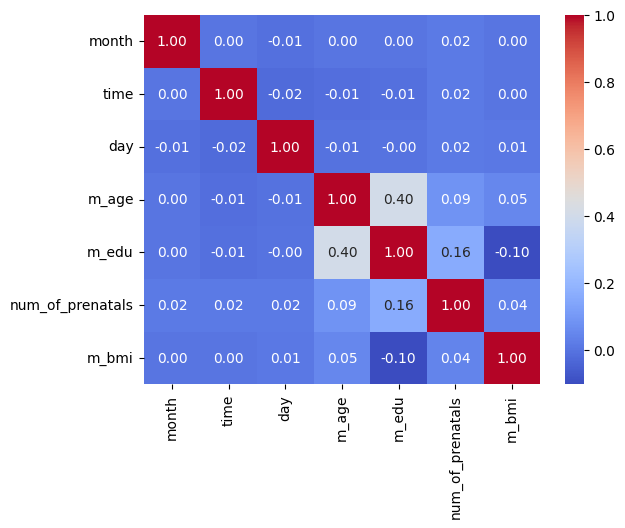

In [39]:
# Pearson correlation coefficient for the variables treated as continuous
sns.heatmap(df_sample[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [27]:
# Matthews correlation coefficient for the binary variables
mcc_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for col1 in cat_cols:
    for col2 in cat_cols:
        mcc = matthews_corrcoef(df_sample[col1], df_sample[col2])
        mcc_matrix.loc[col1, col2] = mcc

<Axes: >

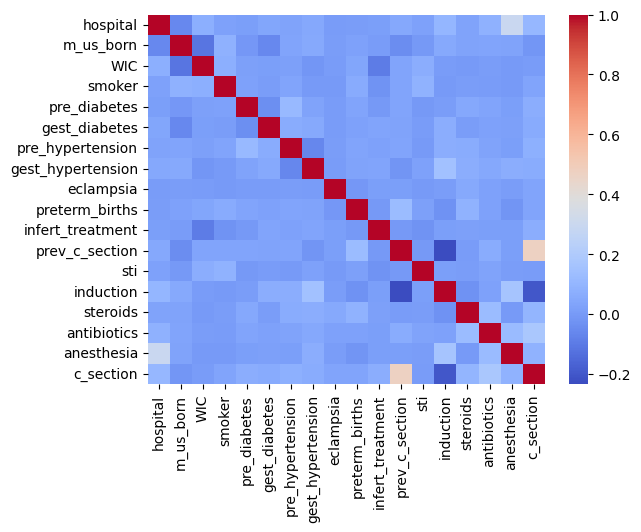

In [28]:
sns.heatmap(mcc_matrix, cmap='coolwarm')

In [36]:
# Point-biserial correlation of binary/continuous pairs
pbc_matrix = pd.DataFrame(index=cat_cols, columns=num_cols, dtype=float)

for col1 in cat_cols:
    for col2 in num_cols:
        r, p_value = pointbiserialr(df_sample[col1], df_sample[col2])
        pbc_matrix.loc[col1, col2] = r

<Axes: >

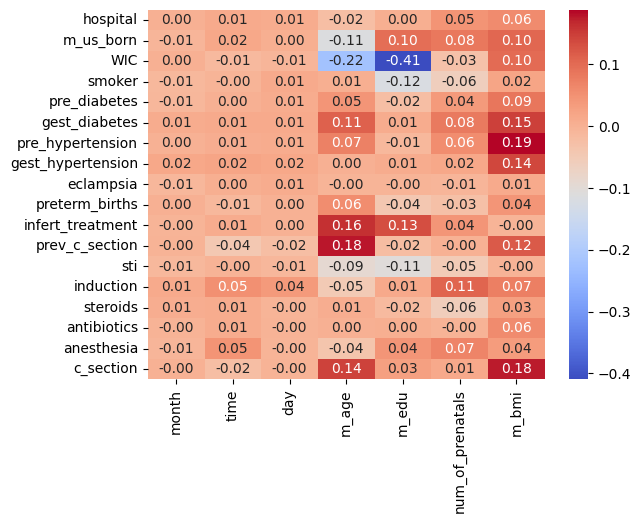

In [38]:
sns.heatmap(pbc_matrix, annot=True, cmap='coolwarm', fmt='.2f')

From the correlation matrices above, we can see that there is very little strong correlation present between the predictors. The highlights worth mentioning:
- The mother's age and education have a correlation of 0.4.
- A c-section birth and having had a previous c-section have a correlation of about 0.4.
- A mother's education and being enrolled in WIC have a correlation of -0.41.

Given this, multicolinearity does not present much of a concern for the interpretability or performance of our models.